## Imports

In [2]:
import os, copy, torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score, accuracy_score, roc_curve, auc,average_precision_score, precision_recall_curve, precision_recall_curve
from sklearn.neural_network import MLPClassifier

# Make a list of column names
cols = ['HR_1', 'Sp02_1', 'dias_1', 'sys_1', 'resp_1',
       'HR_2', 'Sp02_2', 'dias_2', 'sys_2', 'resp_2',
       'HR_3', 'Sp02_3', 'dias_3', 'sys_3', 'resp_3',
       'HR_4', 'Sp02_4', 'dias_4', 'sys_4', 'resp_4']

### Tree Model

Accuracy: 0.6636363636363637


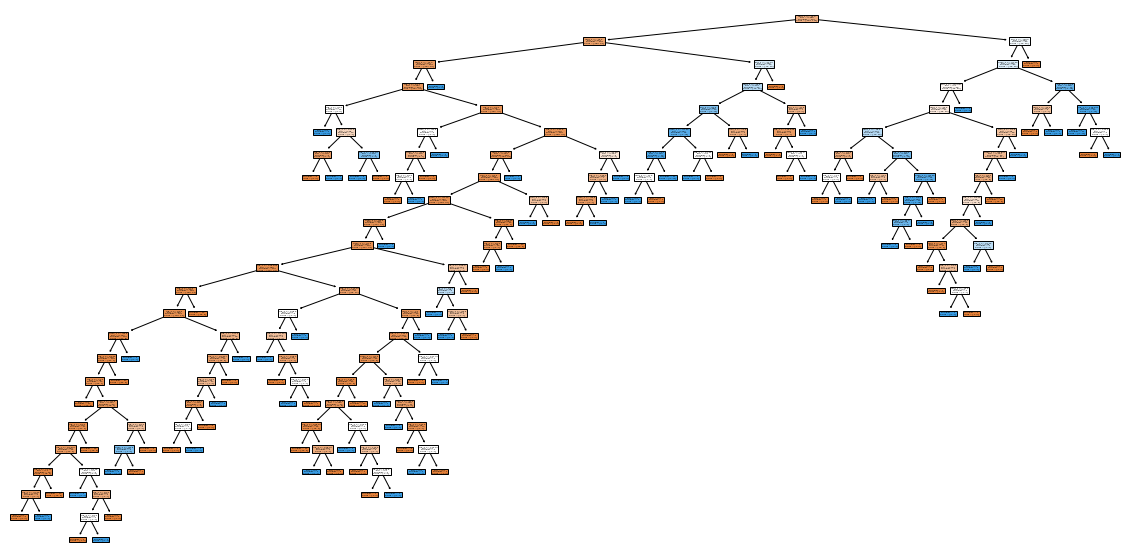

In [3]:
X_train = pd.read_csv("PATH/data/Cleaned_Vitals/train_data.csv").values
y_train = pd.read_csv("PATH/data/Cleaned_Vitals/train_results.csv").values
X_test = pd.read_csv("PATH/data/Cleaned_Vitals/test_data.csv").values
y_test = pd.read_csv("PATH/data/Cleaned_Vitals/test_results.csv").values

def visualize_tree(t, feature_names):
    fig, ax = plt.subplots(figsize=(20, 10))
    plot_tree(t, feature_names=feature_names, filled=True, ax=ax)
    plt.show()

#Build the first tree Model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
visualize_tree(tree, cols)

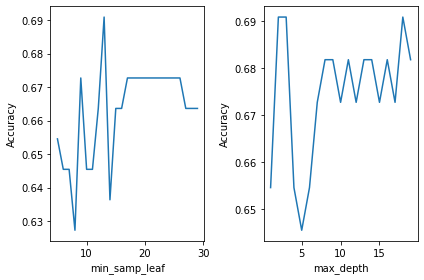

In [4]:
min_samp = []
acc = []

#See how min_samples_leaf impacts accuracy (with fixed max_depth)
for i in range(5,30):
 dtree = DecisionTreeClassifier(max_depth=5, min_samples_leaf = i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc.append(accuracy_score(y_test, pred))
 min_samp.append(i)

data = {'min_samp_leaf': min_samp, 'acc': acc}
df = pd.DataFrame(data)
plt.subplot(1,2,1)
plt.plot('min_samp_leaf', 'acc', data=df)
plt.xlabel('min_samp_leaf')
plt.ylabel('Accuracy')

#See how max_depth impacts accuracy
max_depth = []
acc2 = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc2.append(accuracy_score(y_test, pred))
 max_depth.append(i)

data = {'max_depth': max_depth, 'acc': acc2}
df2 = pd.DataFrame(data)
plt.subplot(1,2,2)
plt.plot('max_depth', 'acc', data=df2)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [29]:
max_depth = []
min_samp = []
acc = []

#Find the optimal combination of max_depth and min_samples_leaf
for d in range(1,5):
    for s in range(5,20):
        tree = DecisionTreeClassifier(max_depth=d, min_samples_leaf = s)
        tree.fit(X_train, y_train)    
        predicted_m, probas_ls = [], []
        predicted_m = tree.predict(X_test)
        probas_ls = tree.predict_proba(X_test)
        fpr_ls, tpr_ls, thresholds_ROC = roc_curve(y_test, probas_ls[:, 1])
        roc_auc_ls = auc(fpr_ls, tpr_ls)
        optimal_idx = np.argmax(tpr_ls - fpr_ls)
        optimal_threshold = thresholds_ROC[optimal_idx]
        sensitivity_ls = tpr_ls[optimal_idx]
        specificity_ls = 1 - fpr_ls[optimal_idx]
        data_pred = np.zeros(len(probas_ls[:, 1]))
        data_pred[probas_ls[:, 1] >= optimal_threshold] = 1
        accuracy_ls = accuracy_score(y_test, data_pred) 
        acc.append(accuracy_ls)
        max_depth.append(d)
        min_samp.append(s)

print("Max_depth")
print(len(max_depth))     
print("Min_samp")
print(len(min_samp))
print(len(acc))
 
data = {'max_depth': max_depth, 'min_samp' :min_samp, 'acc': acc}
df2 = pd.DataFrame(data)
print(df2)

Max_depth
60
Min_samp
60
60
    max_depth  min_samp       acc
0           1         5  0.654545
1           1         6  0.654545
2           1         7  0.654545
3           1         8  0.654545
4           1         9  0.654545
5           1        10  0.654545
6           1        11  0.654545
7           1        12  0.654545
8           1        13  0.654545
9           1        14  0.654545
10          1        15  0.654545
11          1        16  0.654545
12          1        17  0.654545
13          1        18  0.654545
14          1        19  0.654545
15          2         5  0.690909
16          2         6  0.690909
17          2         7  0.690909
18          2         8  0.690909
19          2         9  0.690909
20          2        10  0.690909
21          2        11  0.690909
22          2        12  0.690909
23          2        13  0.690909
24          2        14  0.690909
25          2        15  0.690909
26          2        16  0.690909
27          2       

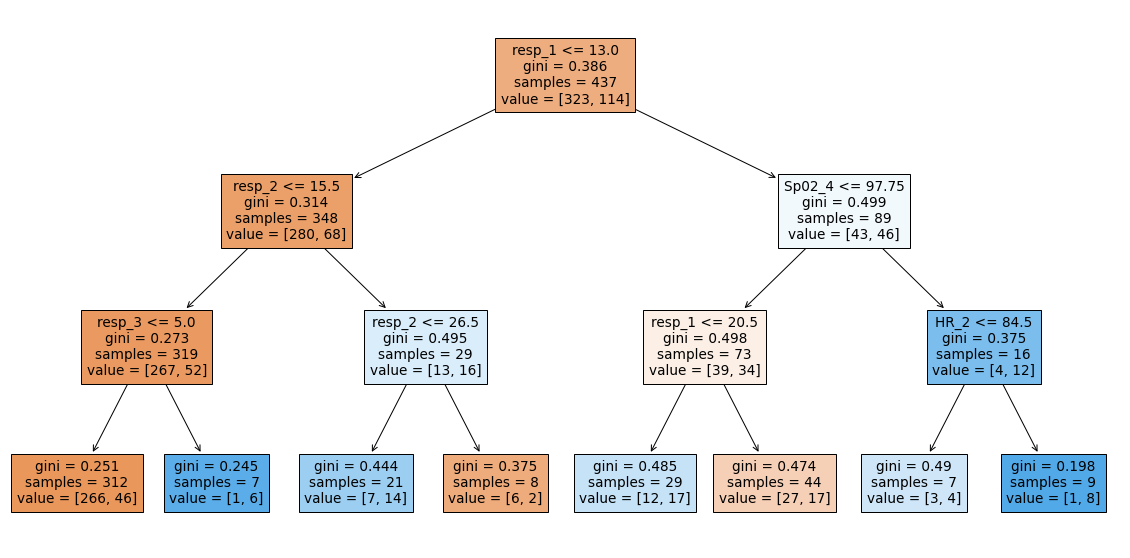

AUC: 64.0 
Accuracy: 70.9


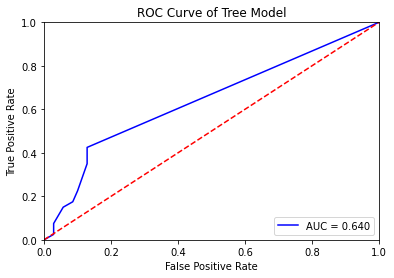

In [30]:
#Build the desired tree Model
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf = 7)
tree.fit(X_train, y_train)
visualize_tree(tree, cols)

# Model Performance
predicted_m, probas_ls = [], []
predicted_m = tree.predict(X_test)
probas_ls = tree.predict_proba(X_test)
fpr_ls, tpr_ls, thresholds_ROC = roc_curve(y_test, probas_ls[:, 1])
roc_auc_ls = auc(fpr_ls, tpr_ls)
optimal_idx = np.argmax(tpr_ls - fpr_ls)
optimal_threshold = thresholds_ROC[optimal_idx]
sensitivity_ls = tpr_ls[optimal_idx]
specificity_ls = 1 - fpr_ls[optimal_idx]
data_pred = np.zeros(len(probas_ls[:, 1]))
data_pred[probas_ls[:, 1] >= optimal_threshold] = 1
accuracy_ls = accuracy_score(y_test, data_pred)
F1_ls = f1_score(y_test, data_pred)
pr_each = average_precision_score(y_test, probas_ls[:, 1])
precision_ls = precision_score(y_test, data_pred)

print("AUC:", round(100*roc_auc_ls,1), 
      "\nAccuracy:", round(100*accuracy_ls, 1))

# ROC curve
plt.title('ROC Curve of Tree Model')
plt.plot(fpr_ls, tpr_ls, 'b', label = 'AUC = %0.3f' % roc_auc_ls)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Save tpr and fpr to make a comparative roc curve
fpr_tree = fpr_ls
tpr_tree = tpr_ls

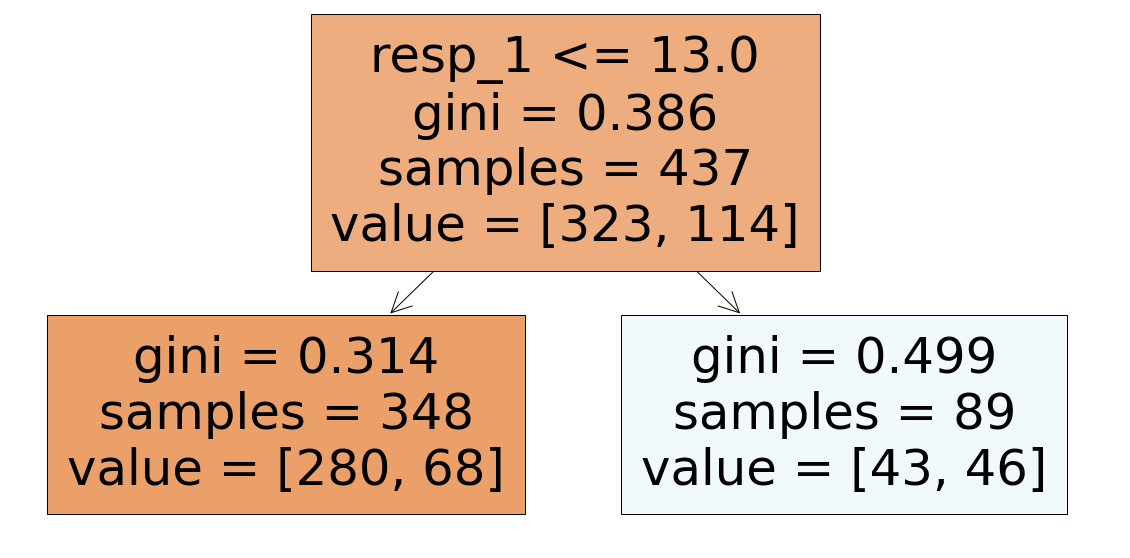

AUC: 56.2 
Accuracy: 65.5


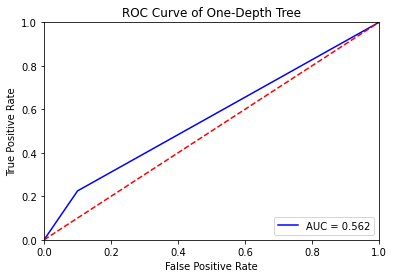

In [32]:
#Make a 1-depth decision tree model
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, y_train)
visualize_tree(tree, cols)


# Model Performance
predicted_m, probas_ls = [], []
predicted_m = tree.predict(X_test)
probas_ls = tree.predict_proba(X_test)
fpr_ls, tpr_ls, thresholds_ROC = roc_curve(y_test, probas_ls[:, 1])
roc_auc_ls = auc(fpr_ls, tpr_ls)
optimal_idx = np.argmax(tpr_ls - fpr_ls)
optimal_threshold = thresholds_ROC[optimal_idx]
sensitivity_ls = tpr_ls[optimal_idx]
specificity_ls = 1 - fpr_ls[optimal_idx]
data_pred = np.zeros(len(probas_ls[:, 1]))
data_pred[probas_ls[:, 1] >= optimal_threshold] = 1
accuracy_ls = accuracy_score(y_test, data_pred)
F1_ls = f1_score(y_test, data_pred)
pr_each = average_precision_score(y_test, probas_ls[:, 1])
precision_ls = precision_score(y_test, data_pred)

print("AUC:", round(100*roc_auc_ls,1), 
      "\nAccuracy:", round(100*accuracy_ls, 1))

# ROC curve
plt.title('ROC Curve of One-Depth Tree')
plt.plot(fpr_ls, tpr_ls, 'b', label = 'AUC = %0.3f' % roc_auc_ls)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Save tpr and fpr to make a comparative roc curve
fpr_1d_tree = fpr_ls
tpr_1d_tree = tpr_ls

### MLP Classifier

[0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
AUC: 52.5 
Accuracy: 68.2


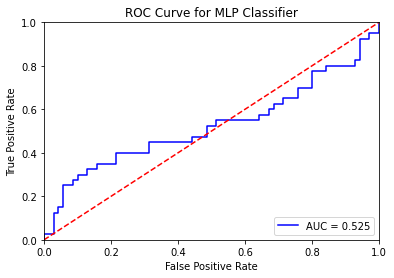

In [95]:
X_train = pd.read_csv("PATH/data/Cleaned_Vitals/scaled_train_data.csv").values
y_train = pd.read_csv("PATH/data/Cleaned_Vitals/train_results.csv").values
X_test = pd.read_csv("PATH/data/Cleaned_Vitals/scaled_test_data.csv").values
y_test = pd.read_csv("PATH/data/Cleaned_Vitals/test_results.csv").values

# Define the MLPClassifier model
model = make_pipeline(MLPClassifier(hidden_layer_sizes=(128,128, 128), activation='relu', solver='adam', max_iter=1000, batch_size=32))
y_train = y_train.reshape(y_train.shape[0])

# Fit the model to the training data
model.fit(X_train, y_train)

# Model Performance
predicted_m, probas_ls = [], []
predicted_m = model.predict(X_test)
probas_ls = model.predict_proba(X_test)
fpr_ls, tpr_ls, thresholds_ROC = roc_curve(y_test, probas_ls[:, 1])
roc_auc_ls = auc(fpr_ls, tpr_ls)
optimal_idx = np.argmax(tpr_ls - fpr_ls)
optimal_threshold = thresholds_ROC[optimal_idx]
sensitivity_ls = tpr_ls[optimal_idx]
specificity_ls = 1 - fpr_ls[optimal_idx]
data_pred = np.zeros(len(probas_ls[:, 1]))
data_pred[probas_ls[:, 1] >= optimal_threshold] = 1
accuracy_ls = accuracy_score(y_test, data_pred)
F1_ls = f1_score(y_test, data_pred)
pr_each = average_precision_score(y_test, probas_ls[:, 1])
precision_ls = precision_score(y_test, data_pred)

print("AUC:", round(100*roc_auc_ls,1), 
      "\nAccuracy:", round(100*accuracy_ls, 1))

# ROC curve
plt.title('ROC Curve for MLP Classifier')
plt.plot(fpr_ls, tpr_ls, 'b', label = 'AUC = %0.3f' % roc_auc_ls)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Save tpr and fpr to make a comparative roc curve
fpr_mlp = fpr_ls
tpr_mlp = tpr_ls

### LSTM

AUC: 0.5707142857142857
Accuracy: 0.7181818181818181


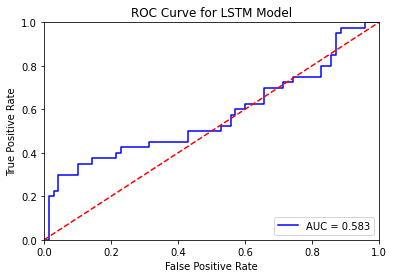

In [142]:
# Read in the data
X_train = (pd.read_csv("PATH/data/Cleaned_Vitals/scaled_train_data.csv")).values
y_train = (pd.read_csv("PATH/data/Cleaned_Vitals/train_results.csv")).values
X_test = (pd.read_csv("PATH/data/Cleaned_Vitals/scaled_test_data.csv")).values
y_test = (pd.read_csv("PATH/data/Cleaned_Vitals/test_results.csv")).values

# Reshape the data to have a shape of (batch_size, sequence_length, input_size)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
y_train = y_train.reshape(y_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
y_test = y_test.reshape(y_test.shape[0], 1)

# Convert the data to PyTorch tensors
X_train_torch = torch.from_numpy(X_train).float()
y_train_torch = torch.from_numpy(y_train).float()
X_test_torch = torch.from_numpy(X_test).float()
y_test_torch = torch.from_numpy(y_test).float()

# Define the LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.lstm1 = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out = self.fc(out[:, -1, :])
        return out
    
    def predict_proba(self, x):
        with torch.no_grad():
            output = self(x)
            return torch.sigmoid(output)

# Define the PyTorch model and optimizer
model = LSTMClassifier(input_size=X_train.shape[2], hidden_size=32, output_size=1)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

# Train the model
for epoch in range(50):
    optimizer.zero_grad()
    output = model(X_train_torch)
    loss = criterion(output.view(-1), y_train_torch.view(-1))
    loss.backward()
    optimizer.step()

# Evaluate the model on the testing data
with torch.no_grad():
    output = model(X_test_torch)
    predictions = (torch.sigmoid(output) >= 0.5).float()

# Make predictions on the test set
predicted_m, probas_ls = [], []
predicted_m = np.round(y_pred)
probas_ls = model.predict_proba(X_test_torch).numpy()
fpr_ls, tpr_ls, thresholds_ROC = roc_curve(y_test, probas_ls)
roc_auc_ls = auc(fpr_ls, tpr_ls)
optimal_idx = np.argmax(tpr_ls - fpr_ls)
optimal_threshold = thresholds_ROC[optimal_idx]
data_pred = np.zeros(len(probas_ls))
#print(probas_ls)
#print(optimal_threshold)
for i in range(len(probas_ls)):
    if probas_ls[i] >= optimal_threshold:
        data_pred[i] = 1
accuracy_lstm = accuracy_score(y_test, data_pred)

# Print the evaluation metrics
print("AUC:", roc_auc_ls)
print("Accuracy:", accuracy_lstm)

# ROC curve
fpr_lstm = fpr_ls
tpr_lstm = tpr_ls

plt.title('ROC Curve for LSTM Model')
plt.plot(fpr_ls, tpr_ls, 'b', label = 'AUC = %0.3f' % auc_lstm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Combined ROC Curve

Text(0, 0.5, 'True Positive Rate')

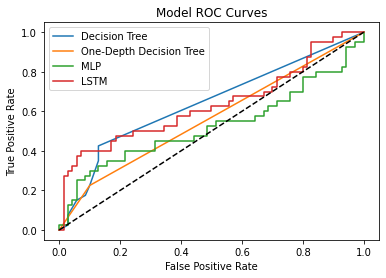

In [123]:
plt.figure(0).clf()

plt.plot(fpr_tree,tpr_tree,label="Decision Tree")
plt.plot(fpr_1d_tree,tpr_1d_tree,label="One-Depth Decision Tree")
plt.plot(fpr_mlp,tpr_mlp,label="MLP")
plt.plot(fpr_lstm,tpr_lstm,label="LSTM")
plt.plot([0, 1], [0, 1],'k--')

plt.legend()
plt.title('Model ROC Curves')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")